# Regression model for determing the housing prices

## importing and splitting data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# import data (only numerical)
data = pd.read_csv('data/AmesHousingFinal.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,112.0,1960.0,1960,1,1960,1656,1080.0,528.0,2.0,1656,6,215000
1,0.0,1961.0,1961,1,1961,896,882.0,730.0,1.0,896,5,105000
2,108.0,1958.0,1958,1,1958,1329,1329.0,312.0,1.0,1329,6,172000
3,0.0,1968.0,1968,2,1968,2110,2110.0,522.0,2.0,2110,7,244000
4,0.0,1997.0,1998,2,1997,928,928.0,482.0,2.0,1629,5,189900


In [3]:
# split data into input and target
target = data['SalePrice']
final_data = data.drop('SalePrice', axis=1)
final_data.head()

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual
0,112.0,1960.0,1960,1,1960,1656,1080.0,528.0,2.0,1656,6
1,0.0,1961.0,1961,1,1961,896,882.0,730.0,1.0,896,5
2,108.0,1958.0,1958,1,1958,1329,1329.0,312.0,1.0,1329,6
3,0.0,1968.0,1968,2,1968,2110,2110.0,522.0,2.0,2110,7
4,0.0,1997.0,1998,2,1997,928,928.0,482.0,2.0,1629,5


In [4]:
# convert the pandas dataframes to numpy ndarrays
X_np = final_data.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)


## Building model

#### Adding  $x_0$to the data

First an extra feature $x_0$ has to be added to the data, the 

In [5]:
def add_x0(x):
    '''
    This function takes a column vector x, adds a column vector of ones in front of it, and returns the 
    combined matrix.
    '''
    # create new feature vector of ones in shape of number of samples * 1 column vector 
    x_zero = np.ones((len(x), 1), dtype = int)

    # combine the new and old feature vectors into matrix
    return np.hstack((x_zero, x))

X = add_x0(X_np)


In [6]:
def define_theta(X):
    '''Returns starting vector for theta with length of features.'''
    return np.ones((X.shape[1], 1))


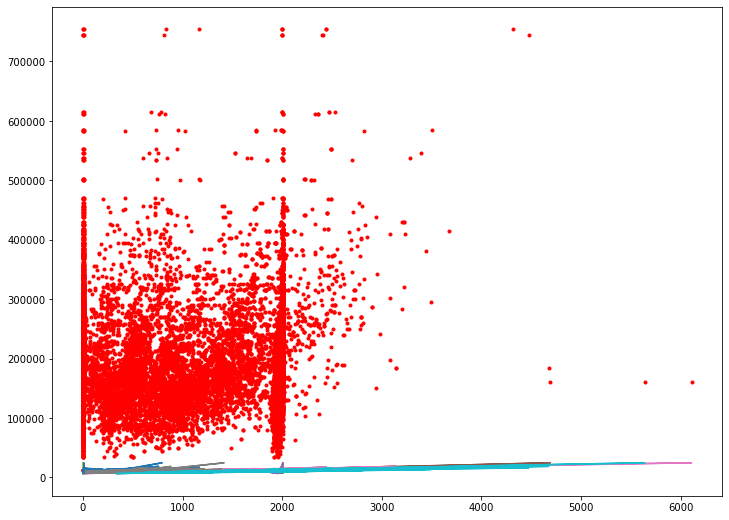

In [7]:
def linear_model(X, theta):
    '''
    This function takes a matrix X and a vector theta and returns the resulting column vector of hypothesis
    values.
    '''
    return np.matmul(X, theta)

theta = define_theta(X_train)

# compute the linear model
h = linear_model(X_train, theta)

# plot the model results
plt.figure(figsize=(12,9))
plt.plot(X_train, y_train, 'r.')
plt.plot(X_train, h)
plt.show()

In [8]:
def linear_cost(theta, X, y):
    '''
    This function returns the cost using matrix multiplication. 
    '''
    # m is identical to the number of rows in X
    m = np.size(X, 0)

    # compute error vector 
    residual = linear_model(X, theta) - y
    
    # compute cost vector  
    cost = np.matmul(residual.T, residual) / (2 * m)
    
    # convert the resulting 1 x 1 numpy matrix to an actual scalar 
    return np.squeeze(cost)

In [9]:
def gradient_vector(theta, X, y):
    '''
    This functions returns a (n + 1) * 1 column vector of partial derivatives. 
    '''
    # m is identical to the number of rows in X
    m = X.shape[0]
    
    # compute error vector
    error = linear_model(X, theta) - y 
  
    # transpose X, compute matrix product, and return gradient vector
    return np.matmul(X.T, error) / m

In [10]:
def gradient_descent(X, y, theta, alpha, thres=10**-6):
    '''
    This function returns a vector for theta for which the cost is the minimum. 
    '''
    # calculate cost with current theta
    previous_cost = linear_cost(theta, X, y)
    
    # set cost difference to amount bigger than the threshold and bigger than 0
    cost_difference = thres + 1
    
    # loop indefinitely until algorithm converges
    while cost_difference > thres: 
        
        # compute and update theta parameters in a single operation
        theta = theta - alpha * gradient_vector(theta, X, y)

        # calculate cost vector with new theta
        current_cost = linear_cost(theta, X, y)

        cost_difference = previous_cost - current_cost

        if cost_difference < 0:
            print('The algorithm is diverging.')
            return theta

        previous_cost = current_cost
    
    return theta
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()